[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/jfcrenshaw/pzflow/blob/main/docs/tutorials/weighted.ipynb)
[![Open on Github](https://img.shields.io/badge/github-Open%20on%20Github-black?logo=github)](https://github.com/jfcrenshaw/pzflow/blob/main/docs/tutorials/weighted.ipynb)


If running in Colab, to switch to GPU, go to the menu and select Runtime -> Change runtime type -> Hardware accelerator -> GPU.

In addition, uncomment and run the following code:

In [1]:
# !pip install pzflow matplotlib


------------------
## Using sample weights in model training

This notebook uses the same data as the introduction, but we will train the network while giving different weights to our training samples.

In [1]:
from pzflow import Flow
from pzflow.examples import get_twomoons_data

import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt


In [2]:
plt.rcParams["figure.facecolor"] = "white"


First let's load the two moons data set again:

In [3]:
data = get_twomoons_data()
data


,x,y
0,-0.748695,0.777733
1,1.690101,-0.207291
2,2.008558,0.285932
3,1.291547,-0.441167
4,0.808686,-0.481017
...,...,...
99995,1.642738,-0.221286
99996,0.981221,0.327815
99997,0.990856,0.182546
99998,-0.343144,0.877573


Let's plot it to see what it looks like.

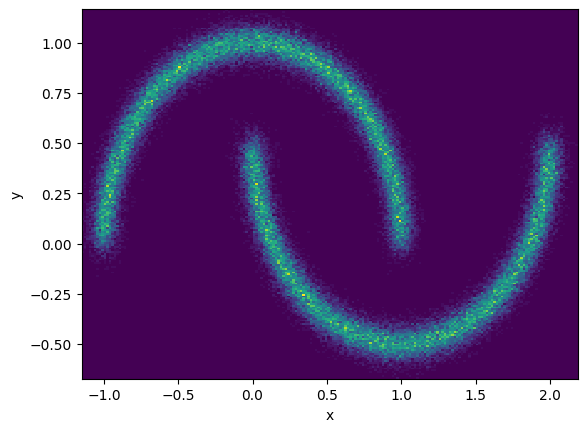

In [4]:
plt.hist2d(data["x"], data["y"], bins=200)
plt.xlabel("x")
plt.ylabel("y")
plt.show()


We will  build the same normalizing flow as in the intro:

In [5]:
flow = Flow(["x", "y"])


But this time we will provide training weights. This might be useful if you want some of your training samples to matter more during the training. Here we will down-weight each of the samples with $y < 0$ by a factor of 10.

In [6]:
weights = np.where(data["y"] > 0, 1.0, 0.1)
weights

array([1. , 0.1, 1. , ..., 1. , 1. , 1. ], shape=(100000,))

Now let's train with these weights

In [8]:
%%time
losses = flow.train(data, train_weight=weights, verbose=True)

Training 100 epochs 
Loss:
(0) 2.2899
(1) 1.5460
(6) 0.7903
(11) 0.7530
(16) 0.7329
(21) 0.7621
(26) 0.7386
(31) 0.7128
(36) 0.6850
(41) 0.7337
(46) 0.7127
(51) 0.7068
(56) 0.7009
(61) 0.7088
(66) 0.7496
(71) 0.6928
(76) 0.7147
(81) 0.7337
(86) 0.7417
(91) 0.7321
(96) 0.7316
(100) 0.6802
CPU times: user 6min 34s, sys: 1min 19s, total: 7min 54s
Wall time: 1min 1s


Now let's plot the training losses to make sure everything looks like we expect it to...

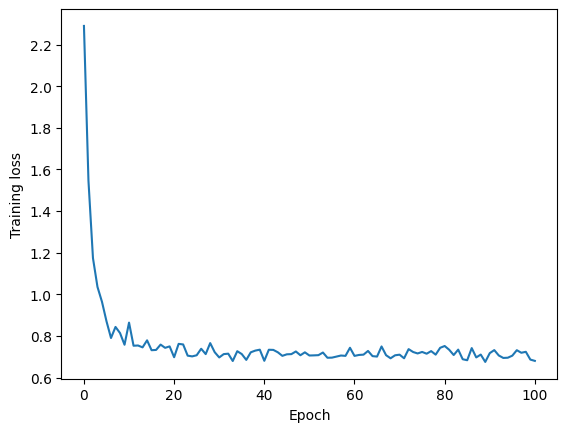

In [9]:
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Training loss")
plt.show()


Perfect!

Now we can draw samples from the flow, using the `sample` method.
Let's draw 10000 samples and make another histogram to see if it matches the data.

In [10]:
samples = flow.sample(10_000, seed=0)


This time we see that the flow really suppresses samples for $y < 0$, as expected given our training weights!

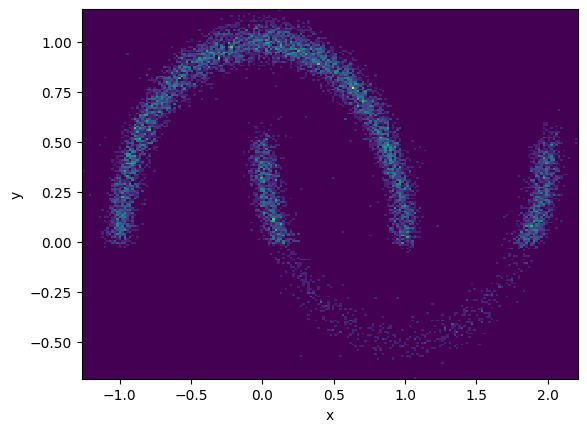

In [11]:
plt.hist2d(samples["x"], samples["y"], bins=200)
plt.xlabel("x")
plt.ylabel("y")
plt.show()
